# LOGISTIC REGRESSION

### Data Exploration
**load dataset and perform EDA**

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [28]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [29]:
print('Shape:', df.shape)
display(df.info())
display(df.describe().T)

Shape: (768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


None

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


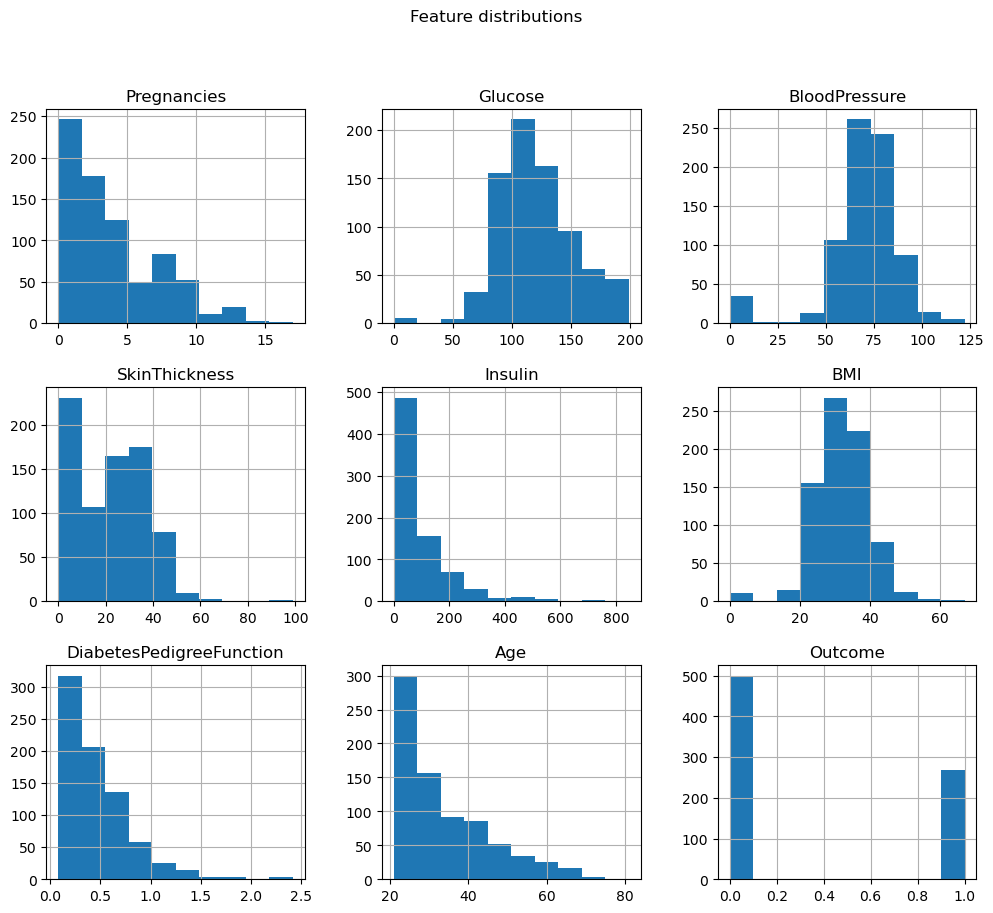

In [30]:
# Histograms
df.hist(figsize=(12,10));
plt.suptitle('Feature distributions');

## 2. Data Preprocessing
##### a. Handle missing values:In this dataset, zeros in certain columns (Glucose, BloodPressure, SkinThickness, Insulin, BMI) are treated as missing and imputed with the median.
##### b. Encode categorical variables**

In [31]:
from sklearn.impute import SimpleImputer
cols_with_zero_as_missing = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
df_imputed = df.copy()
imputer = SimpleImputer(missing_values=0, strategy='median')
df_imputed[cols_with_zero_as_missing] = imputer.fit_transform(df_imputed[cols_with_zero_as_missing])
display(df_imputed[cols_with_zero_as_missing].describe().T)
# Show counts of zeros after imputation
zero_counts = (df_imputed[cols_with_zero_as_missing] == 0).sum()
print('Zeros remaining per column after imputation:\n', zero_counts)


,count,mean,std,min,25%,50%,75%,max
Glucose,768.0,121.656250,30.438286,44.0,99.75,117.0,140.25,199.0
BloodPressure,768.0,72.386719,12.096642,24.0,64.00,72.0,80.00,122.0
SkinThickness,768.0,29.108073,8.791221,7.0,25.00,29.0,32.00,99.0
Insulin,768.0,140.671875,86.383060,14.0,121.50,125.0,127.25,846.0
BMI,768.0,32.455208,6.875177,18.2,27.50,32.3,36.60,67.1


Zeros remaining per column after imputation:
 Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64


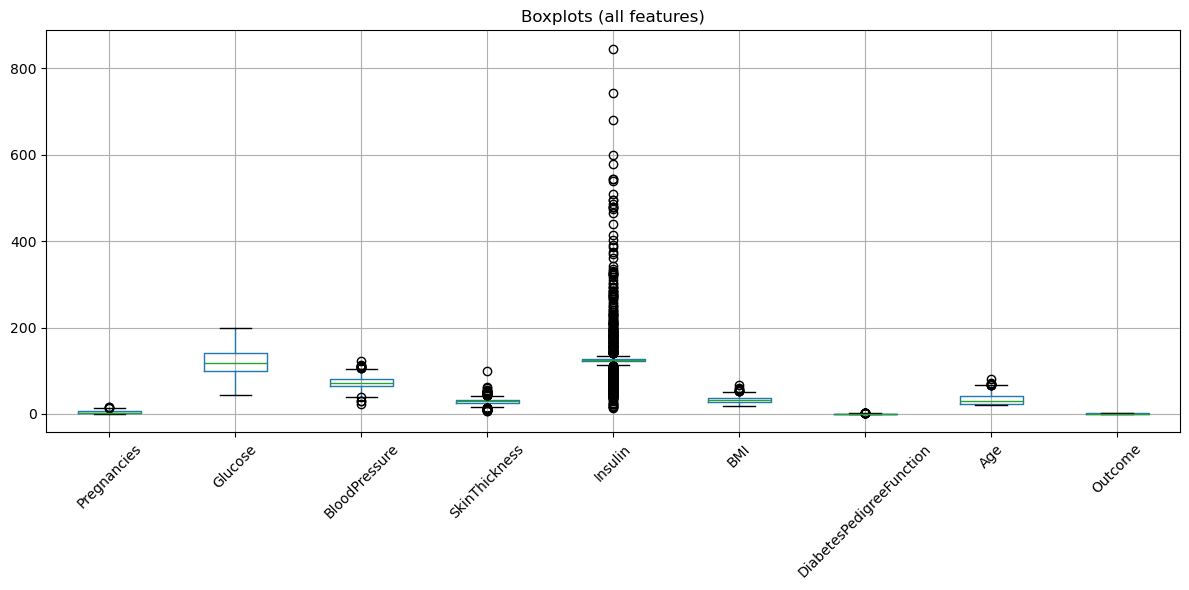

In [32]:
#vizualization(boxplot)
plt.figure(figsize=(12,6))
df_imputed.boxplot(rot=45)
plt.title('Boxplots (all features)')
plt.tight_layout()

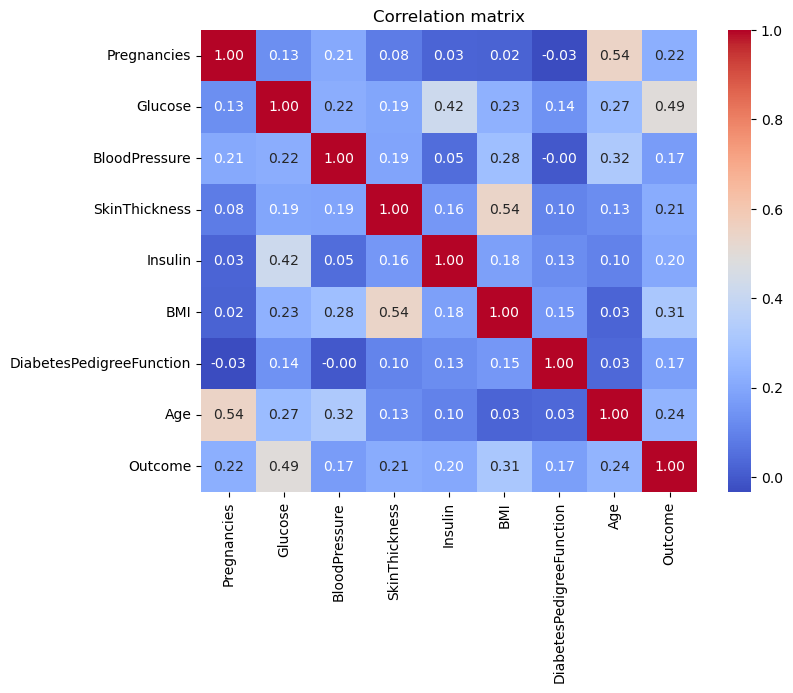

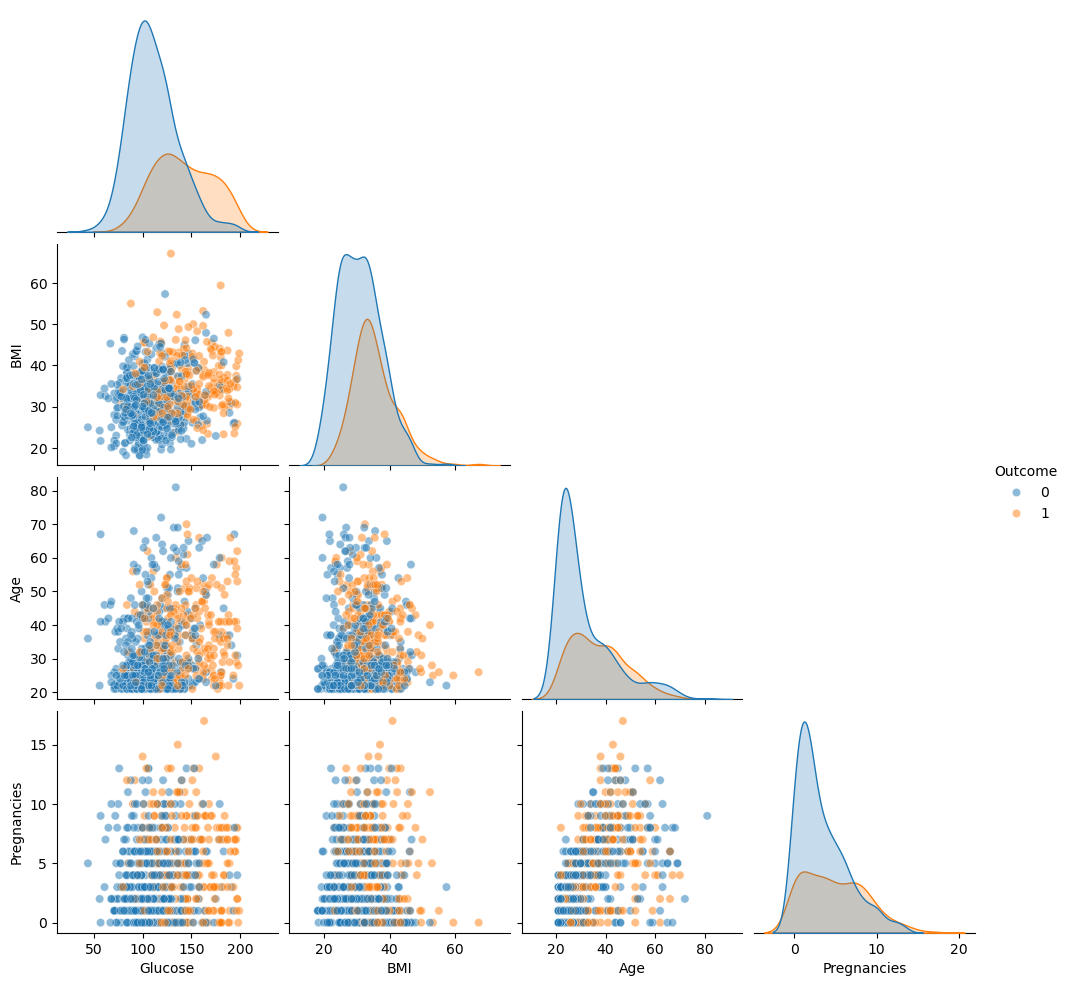

In [33]:
#correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df_imputed.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation matrix')

# Pairplot of a subset for readability
sns.pairplot(df_imputed[['Glucose','BMI','Age','Pregnancies','Outcome']], hue='Outcome', corner=True, plot_kws={'alpha':0.5})


## 3. Model Building

**a. Build a logistic regression model**

Split the data, scale features, train a LogisticRegression model from scikit-learn.

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression



In [35]:
X = df_imputed.drop('Outcome', axis=1)
y = df_imputed['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [36]:
print('Model trained.')

Model trained.


### 4. Model Evaluation

Evaluates on the test set using accuracy, precision, recall, F1-score, and ROC-AUC. Visualize the ROC curve.

In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt

In [38]:

y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:,1]

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
rocauc = roc_auc_score(y_test, y_prob)

print('Accuracy: {:.4f}'.format(acc))
print('Precision: {:.4f}'.format(prec))
print('Recall: {:.4f}'.format(rec))
print('F1-score: {:.4f}'.format(f1))
print('ROC-AUC: {:.4f}'.format(rocauc))
print('\nConfusion matrix:\n', confusion_matrix(y_test, y_pred))
print('\nClassification report:\n', classification_report(y_test, y_pred, digits=4))



Accuracy: 0.7292
Precision: 0.6364
Recall: 0.5224
F1-score: 0.5738
ROC-AUC: 0.8239

Confusion matrix:
 [[105  20]
 [ 32  35]]

Classification report:
               precision    recall  f1-score   support

           0     0.7664    0.8400    0.8015       125
           1     0.6364    0.5224    0.5738        67

    accuracy                         0.7292       192
   macro avg     0.7014    0.6812    0.6876       192
weighted avg     0.7210    0.7292    0.7220       192



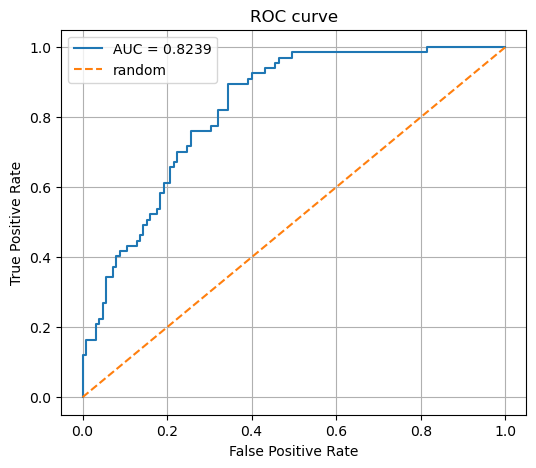

In [39]:
##roccurve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'AUC = {auc(fpr,tpr):.4f}')
plt.plot([0,1],[0,1],'--', label='random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend()
plt.grid(True)


## 5. Interpretation

**a. Interpreting the coefficients** 

In [40]:

import pandas as pd
import numpy as np
coef_df = pd.DataFrame({'feature': X.columns, 'coefficient': model.coef_[0]})
coef_df['odds_ratio'] = np.exp(coef_df['coefficient'])
coef_df = coef_df.sort_values(by='odds_ratio', ascending=False).reset_index(drop=True)
display(coef_df)


,feature,coefficient,odds_ratio
0,Glucose,1.161295,3.194067
1,BMI,0.723999,2.062665
2,Pregnancies,0.440493,1.553473
3,DiabetesPedigreeFunction,0.212284,1.236499
4,Age,0.126013,1.134296
5,Insulin,-0.030734,0.969733
6,BloodPressure,-0.057326,0.944286
7,SkinThickness,-0.058342,0.943327


**b. Discuss feature significance**
The significance of each feature in predicting diabetes can be understood from the magnitude and direction of the logistic regression coefficients. Among all features, Glucose shows the largest positive coefficient, indicating that higher glucose levels strongly increase the likelihood of diabetes and make it the most influential predictor in the model. BMI, Age, and Diabetes Pedigree Function also have notable positive coefficients, suggesting that individuals with higher body mass index, older age, or a stronger family history of diabetes have a higher probability of being diabetic.These variables may still provide minor improvements but do not significantly shift the prediction compared to Glucose or BMI. Overall, the model identifies Glucose and BMI as the most critical determinants of diabetes prediction.Features are most important according to odds ratios and clinical intuition (e.g., higher glucose and BMI typically increase diabetes risk).

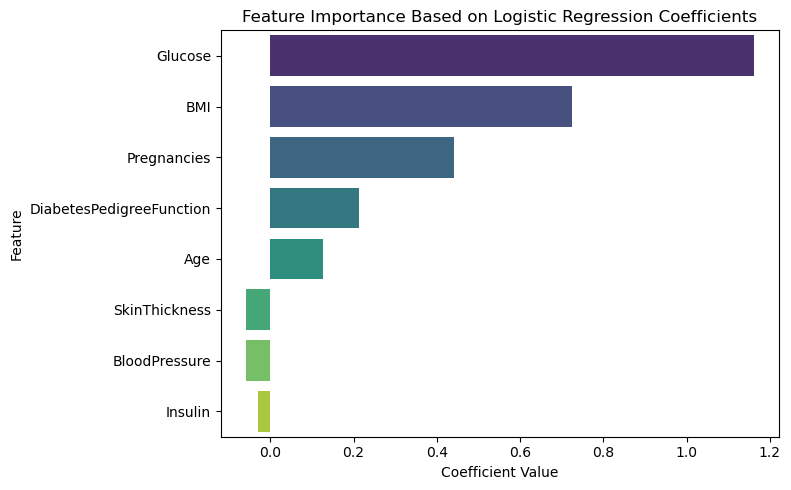

In [41]:
# Visualize Feature Importance
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(8,5))
sns.barplot(
    x='Coefficient',
    y='Feature',
    data=coefficients,     # This DataFrame is created earlier using model.coef_
    palette='viridis'
)

plt.title("Feature Importance Based on Logistic Regression Coefficients")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [42]:
## cross validation
print('Precision = TP / (TP + FP) -> of predicted positives, how many are correct.')
print('Recall = TP / (TP + FN) -> of actual positives, how many did we detect.')
print('\nCross-validation:') 
print('Cross-validation (e.g., k-fold) splits data into k folds, trains on k-1 folds and validates on the remaining fold repeated k times.')
print('It provides a more robust estimate of generalization performance, helps detect overfitting, and is commonly used for model selection and hyperparameter tuning.')

Precision = TP / (TP + FP) -> of predicted positives, how many are correct.
Recall = TP / (TP + FN) -> of actual positives, how many did we detect.

Cross-validation:
Cross-validation (e.g., k-fold) splits data into k folds, trains on k-1 folds and validates on the remaining fold repeated k times.
It provides a more robust estimate of generalization performance, helps detect overfitting, and is commonly used for model selection and hyperparameter tuning.


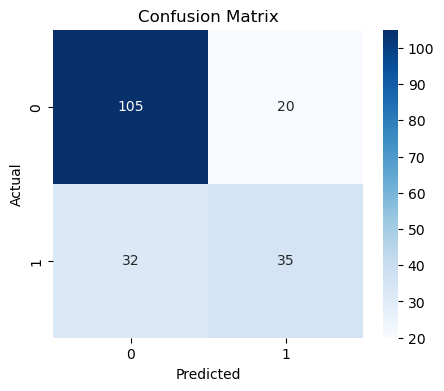

In [43]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [44]:
# Create a DataFrame for feature importance (coefficients)
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]       # model = LogisticRegression(...)
})

In [45]:
# Sort by strongest impact
coefficients['Abs_Coefficient'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values(by='Abs_Coefficient', ascending=False)

In [46]:
# Display coefficient table
print("\n--- Logistic Regression Coefficients ---")
display(coefficients)



--- Logistic Regression Coefficients ---


,Feature,Coefficient,Abs_Coefficient
1,Glucose,1.161295,1.161295
5,BMI,0.723999,0.723999
0,Pregnancies,0.440493,0.440493
6,DiabetesPedigreeFunction,0.212284,0.212284
7,Age,0.126013,0.126013
3,SkinThickness,-0.058342,0.058342
2,BloodPressure,-0.057326,0.057326
4,Insulin,-0.030734,0.030734


## 6.Deployment with Streamlit

In [47]:
import pickle

# Save model
pickle.dump(model, open('diabetes_model.pkl', 'wb'))

# Save scaler
pickle.dump(scaler, open('diabetes_scaler.pkl', 'wb'))


In [48]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import pickle

# Load model and scaler
model = pickle.load(open('diabetes_model.pkl', 'rb'))
scaler = pickle.load(open('diabetes_scaler.pkl', 'rb'))

st.title(" 🩺 Diabetes Prediction App")
st.markdown("This Streamlit app predicts whether a person has diabetes based on medical data.")

# User Inputs
Pregnancies = st.number_input("Pregnancies", 0, 20, 2)
Glucose = st.number_input("Glucose Level", 0, 300, 120)
BloodPressure = st.number_input("Blood Pressure", 0, 200, 70)
SkinThickness = st.number_input("Skin Thickness", 0, 100, 20)
Insulin = st.number_input("Insulin Level", 0, 900, 80)
BMI = st.number_input("BMI", 0.0, 70.0, 32.0)
DPF = st.number_input("Diabetes Pedigree Function", 0.0, 5.0, 0.5, format="%.3f")
Age = st.number_input("Age", 1, 120, 33)

# Make DataFrame
input_data = pd.DataFrame({
    'Pregnancies': [Pregnancies],
    'Glucose': [Glucose],
    'BloodPressure': [BloodPressure],
    'SkinThickness': [SkinThickness],
    'Insulin': [Insulin],
    'BMI': [BMI],
    'DiabetesPedigreeFunction': [DPF],
    'Age': [Age]
})

# Scale input
scaled_input = scaler.transform(input_data)

# Prediction
if st.button("Predict Diabetes"):
    pred = model.predict(scaled_input)[0]
    prob = model.predict_proba(scaled_input)[0][1]

    if pred == 1:
        st.error(f" 🔴 The person is likely DIABETIC. (Probability: {prob:.2f})")
    else:
        st.success(f" 🟢 The person is NOT diabetic. (Probability: {prob:.2f})")


Overwriting app.py


In [ ]:
from pyngrok import ngrok

# Kill old tunnels
ngrok.kill()

# Run Streamlit
get_ipython().system_raw('streamlit run app.py --server.port 8502 &')

# Create public URL
public_url = ngrok.connect(8502)
print("Your Diabetes Streamlit App is Live At:")
print(public_url)


In [ ]:
from pyngrok import ngrok
ngrok.set_auth_token("35VdrrzzwThEcuZp6JKe5CBdF1f_7Mm3Vpz1ukfduoQr88Gb2")


## Interview Questions

---

### **1. What is the difference between precision and recall?**

Precision and recall are evaluation metrics used in binary classification to measure different aspects of model performance. **Precision** indicates how many of the instances predicted as positive are actually correct. It focuses on reducing **false positives**, which is important in applications where incorrect positive predictions are costly. **Recall**, on the other hand, measures how many actual positive cases the model successfully identifies. It focuses on reducing **false negatives**, which is important in situations where missing a positive case is critical. In summary, precision measures *accuracy of positive predictions*, while recall measures *completeness in identifying positive cases*. Both metrics complement each other.

---

### **2. What is cross-validation, and why is it important in binary classification?**

Cross-validation is a technique used to evaluate a machine learning model’s performance more reliably by dividing the dataset into multiple folds. In **k-fold cross-validation**, the data is split into *k* parts; the model is trained on *k–1* folds and tested on the remaining fold. This process repeats until each fold has been used for testing once, and the final score is the average of all folds. Cross-validation is important because it reduces the risk of overfitting, provides a more stable performance estimate, and ensures the model generalizes well. In binary classification, it is especially useful when class distributions are imbalanced.

---
